In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split ##for splitting into training and testing datasets

from sklearn.ensemble import RandomForestClassifier  ##Random Forest Classifer
from sklearn.tree import DecisionTreeClassifier  ##Decision Tree Classifier from sklearn
from sklearn.neighbors import KNeighborsClassifier  ##KNN Classification

from sklearn.metrics import accuracy_score, confusion_matrix  ##for accuracy, sensitivity and specificity
from sklearn.metrics import roc_curve, roc_auc_score ##Plotting the ROC curve and display AUC score
from sklearn.model_selection import GridSearchCV ##For implementing a Grid Search for hyperparameter tuning
from sklearn.feature_selection import RFECV ## For Implementing feature selection Recurcive feature Elimination with cross validation(RFECV)
##this is a wrapper method

In [ ]:
df = pd.read_csv("/root/heartData.csv")   ##dataset in root folder when working on colab

In [ ]:
print(df.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   45   M           ATA        140          224          1     Normal    122   
1   59   F           ASY        130          338          1         ST    130   
2   35   F            TA        120          160          0         ST    185   
3   34   M            TA        140          156          0     Normal    180   
4   47   F           NAP        135          248          1     Normal    170   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              Y      1.5     Flat             1  
2              N      0.0       Up             0  
3              N      0.0     Flat             1  
4              N      0.0     Flat             1  


In [ ]:
df = df.drop(labels = ["Age", "Sex"], axis = 1)   ##dropping these columns because they do not matter if the person has heart disease or not 

In [ ]:
X = df.drop(labels = "HeartDisease", axis = 1)   ##these are the independent variables the HeartDisease column is the dependent variables 
##so the new dataframe X does NOT have it

In [ ]:
Y = df["HeartDisease"] ##This is the dependent variable the Y dataframe consists only of the HeartDisease column

In [ ]:
print(X.head())

  ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0           ATA        140          224          1     Normal    122   
1           ASY        130          338          1         ST    130   
2            TA        120          160          0         ST    185   
3            TA        140          156          0     Normal    180   
4           NAP        135          248          1     Normal    170   

  ExerciseAngina  Oldpeak ST_Slope  
0              N      0.0       Up  
1              Y      1.5     Flat  
2              N      0.0       Up  
3              N      0.0     Flat  
4              N      0.0     Flat  


In [ ]:
##X contains categorical data which has o be converted into numerical data
##Because I feel there are already too many columns I am not using one-hot encoding
##so I am using Label encoding using replace method

In [ ]:
X['ChestPainType'].replace(['TA', 'ATA', 'NAP', 'ASY'], [0,1,2,3], inplace=True)  ##from the kaggle dataset overview 
##the ChestPainType has 4 types which are replace with TA=0, ATA=1, NAP=2, ASY=3 

In [ ]:
X['RestingECG'].replace(['Normal', 'ST', 'LVH'], [0,1,2], inplace=True) ##Normal=0, ST=1, LVH=2

In [ ]:
X['ExerciseAngina'].replace(['N', 'Y'], [0,1], inplace=True) ##N=0, Y=1

In [ ]:
X['ST_Slope'].replace(['Flat', 'Up', 'Down'], [0,1,2], inplace=True) ##Flat=0, Up=1, Down=2

In [ ]:
print(X.head())

   ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  \
0              1        140          224          1           0    122   
1              3        130          338          1           1    130   
2              0        120          160          0           1    185   
3              0        140          156          0           0    180   
4              2        135          248          1           0    170   

   ExerciseAngina  Oldpeak  ST_Slope  
0               0      0.0         1  
1               1      1.5         0  
2               0      0.0         1  
3               0      0.0         0  
4               0      0.0         0  


In [ ]:
Y = Y.astype('int')  ##converting all Y elements into int data type

In [ ]:
##now we split both X and Y into training and testing, for training we will use both X and Y datasets and then we will try to predict the 
## Y testing dataset using X testing dataset, the difference between the original Y testing dataset and predicted Y testing dtaset will 
##show the accuracy

In [ ]:
Xtraining, Xtesting, Ytraining, Ytesting = train_test_split(X, Y, test_size = 0.2, random_state = 10) ##test_size = 0.2 as question says
##80% training and 20% testing, random_state is put a fixed number so that on each run my testing and traing datasets remain same and not randomized

In [ ]:
##now creating a random forest model the class is already imported in the begining
RandomForestModel = RandomForestClassifier(n_estimators=100, random_state=10)  ##the n_estimators is the number of trees in the random forest
##default value is 100 also random_state is put a fixed number for reasons stated above

In [ ]:
##now training the model using the traing datasets of both dependent and independent variables using the method fit

RandomForestModel.fit(Xtraining, Ytraining)

RandomForestClassifier(random_state=10)

In [ ]:
#now generating a prediction using the X testing dataset

YPredicting = RandomForestModel.predict(Xtesting)

In [ ]:
##for finding the accuracy with inbuilt accuracy_score
accuracy = accuracy_score(Ytesting, YPredicting) * 100
print("Accuracy = ", accuracy,"%")

Accuracy =  95.0 %


In [ ]:
##form confusion matrix we will extract sensitivity and specificity
confMat = confusion_matrix(Ytesting, YPredicting)

In [ ]:
TP, FP, FN, TN = confMat[0,0], confMat[0,1], confMat[1, 0], confMat[1,1]  ##elements of the confusion matrix TP(True Positive) all positives correctly classified
##FP(False Negative) all positives falsely classified
##FN(False Negatives) all negatives falsely classified
##TN(True Negative) all negatives correctly classified

In [ ]:
##Sensitivity is true positives divided by all positives that is true positive + false negetives
sensitivity = TP/(TP+FN)

In [ ]:
#Specificity is all the true negatives divided by negatives that is true negetives + false positives
specificity = TN/(TN+FP)

Random Forest Classification before feature selection method
Accuracy =  95.0 % 
Sensitivity =  1.0 
Specificity =  0.875


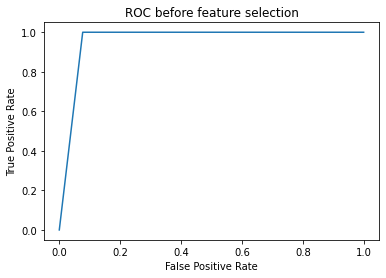


AUC score before feauture selection =  0.9615384615384616


In [ ]:
print("Random Forest Classification before feature selection method")        ##Printing the performance measures
print("Accuracy = ", accuracy, "%", "\nSensitivity = ", sensitivity, "\nSpecificity = ", specificity)
##plotting the ROC curve and outputting AUC score
FPR, TPR, thresholds = roc_curve(Ytesting, YPredicting)    ##The roc_curve function returns the False Positive rate(FPR) which is the rate at which
##the model misclassifies a positive or it is 1 - specificity (True negetive rate)
##it also returns the true positive rate(TPR) which is the rate at which the model correctly classifies all positives
##and then the threshold which on changing up or down will change the models classification outcome
plt.plot(FPR, TPR)           ##both the FPR and TPR are plotted in X and Y axis respectively
plt.title("ROC before feature selection")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

rfAuc1 = roc_auc_score(Ytesting, YPredicting)   ##the AUC is the area under the curve of the graph which is calculated by roc_auc_score
print("\nAUC score before feauture selection = ", rfAuc1)

In [ ]:
##HYPERPARAMETER TUNING

In [ ]:
RandomForestModel.get_params()     ##checking what are the parameters to tune in the model

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 10,
 'verbose': 0,
 'warm_start': False}

In [ ]:
##GridSearchCV has argument param_grid which has to be a grid like structure and is implemented as dictionary with names same as printd above
##The following parameters are to be tuned and the GridSearchCV does a exhaustive search using this grid to find the best features
##the meaning of each feature can be found in documentation for sklearn.ensemble.RandomForestClassifier
parameterGrid = {
    
    'bootstrap':[True, False], 
    'max_depth':[5, 10],
    'max_features':['auto', 'log2'],
    'max_leaf_nodes':[10, 20],
    'min_samples_leaf': [4, 5],
    'min_samples_split': [2, 3],
    'min_weight_fraction_leaf': [0.1, 0.2],
    'n_estimators': [10, 100],
}

##new model using GridSearchCV here cross-validation is set to 5
RandomForestModel2 = GridSearchCV(RandomForestModel, parameterGrid, scoring = 'accuracy', cv = 5, verbose = 2)  

In [ ]:
Xtemp = Xtraining           ##copying X and Y to temperory variables
Ytemp = Ytraining

In [ ]:
RandomForestModel2.fit(Xtemp, Ytemp)   ##then training the model as before using fit to find out the best combo of features
##This takes a while as the machine goes through all combinations

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV] END bootstrap=True, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=10; total time=   0.0s
[CV] END bootstrap=True, max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=4, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=10; total time=   0.0s
[CV] END bootstrap=Tr

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10],
                         'max_features': ['auto', 'log2'],
                         'max_leaf_nodes': [10, 20], 'min_samples_leaf': [4, 5],
                         'min_samples_split': [2, 3],
                         'min_weight_fraction_leaf': [0.1, 0.2],
                         'n_estimators': [10, 100]},
             scoring='accuracy', verbose=2)

In [ ]:
RandomForestModel2.best_params_    ##.best_params_ returns the best parameters 

{'bootstrap': False,
 'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.1,
 'n_estimators': 100}

In [ ]:
##FEATURE SELECTION

In [ ]:
##The wrapper method RFECV (Recursive Feature Elimination with Cross-Validation) is used
##Wrapper methods like RFECV divide the features of the dataset into subset features and then recursively search for the best subset
##it keeps the best subsets and discards the rest
##As a wrapper method when initializing we have to give an estimator this is the algorithm used to search for best subset of features
##the estimator can be different from the classifier used for the model but here both are RandomForestClassifier
wrapper = RFECV(estimator=RandomForestClassifier(), cv=5, scoring = 'accuracy')  ##this method comes with cross-validation we are doind a 5-fold CV
wrapper = wrapper.fit(Xtraining, Ytraining)    ##training the wrapper on previous training datasets 
newXtraining = wrapper.transform(Xtraining)   ##The X training and testing datasets are transformed using transform()
newXtesting = wrapper.transform(Xtesting)     ##transform() only keeps the selected features and discards the rest

In [ ]:
RandomForestModel3 = RandomForestClassifier()   ##creating a new Random Forest Classifier Model
RandomForestModel3.fit(newXtraining, Ytraining) ##Training the model using the new X training dataset with
##only selected features achived from transforming
newYPredicting = RandomForestModel3.predict(newXtesting)  ##predicting using new X testining dataset

Random Forest Classification after feature selection method
Accuracy =  90.0 % 
Sensitivity =  1.0 
Specificity =  0.7777777777777778


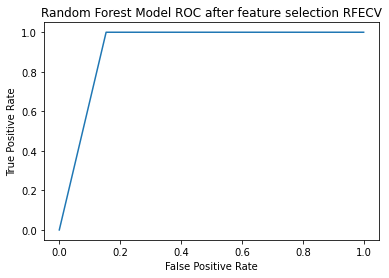


AUC score after feauture selection =  0.9230769230769231


In [ ]:
##As before calculate the Performance measures using built in functions
accuracy1 = accuracy_score(Ytesting, newYPredicting) * 100  ##new accuracy
confMat1 = confusion_matrix(Ytesting, newYPredicting)  ##new Confusion matrix
TP, FP, FN, TN = confMat1[0,0], confMat1[0,1], confMat1[1, 0], confMat1[1,1]  ##all parameters of the confusion matrix
sensitivity1 = TP/(TP+FN)  ##calculate new sensitivity and new specificity
specificity1 = TN/(TN+FP)
print("Random Forest Classification after feature selection method")   ##print all the performance measures
print("Accuracy = ", accuracy1, "%", "\nSensitivity = ", sensitivity1, "\nSpecificity = ", specificity1)
FPR, TPR, thresholds = roc_curve(Ytesting, newYPredicting)    ##The roc_curve function for the classifer after feature selection
plt.plot(FPR, TPR)           ##both the FPR and TPR are plotted in X and Y axis respectively
plt.title("Random Forest Model ROC after feature selection RFECV")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

##new AUC score
rfAuc2 = roc_auc_score(Ytesting, newYPredicting)   ##the AUC is the area under the curve of the graph which is calculated by roc_auc_score
print("\nAUC score after feauture selection = ", rfAuc2)

In [ ]:
##DESICION TREES

In [ ]:
##splitting data again
Xtraining, Xtesting, Ytraining, Ytesting = train_test_split(X, Y, test_size = 0.2, random_state = 10) ##test_size = 0.2 as question says
##80% training and 20% testing
DecisionTreeModel = DecisionTreeClassifier(random_state=10)   ##create model
DecisionTreeModel.fit(Xtraining, Ytraining)  ##train model
YPredicting = DecisionTreeModel.predict(Xtesting)  ##prediction
##accuracy with inbuilt accuracy_score
accuracy2 = accuracy_score(Ytesting, YPredicting) * 100
print("Accuracy = ", accuracy2,"%")

Accuracy =  85.0 %


Decision Tree Classification before feature selection method
Accuracy =  85.0 % 
Sensitivity =  0.8571428571428571 
Specificity =  0.8333333333333334


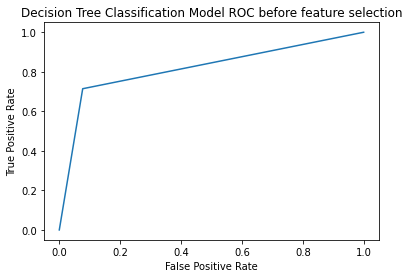


AUC score before feauture selection =  0.8186813186813188


In [ ]:
confMat2 = confusion_matrix(Ytesting, YPredicting)  ##Confusion matrix
TP, FP, FN, TN = confMat2[0,0], confMat2[0,1], confMat2[1, 0], confMat2[1,1]  ##all parameters of the confusion matrix
sensitivity2 = TP/(TP+FN)  ##sensitivity and specificity
specificity2 = TN/(TN+FP)
print("Decision Tree Classification before feature selection method")   ##print all the performance measures
print("Accuracy = ", accuracy2, "%", "\nSensitivity = ", sensitivity2, "\nSpecificity = ", specificity2)
FPR, TPR, thresholds = roc_curve(Ytesting, YPredicting)    ##The roc_curve function for the Decision Tree classifer before feature selection
plt.plot(FPR, TPR)           ##both the FPR and TPR are plotted in X and Y axis respectively
plt.title("Decision Tree Classification Model ROC before feature selection")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

##AUC score
dtAuc1 = roc_auc_score(Ytesting, YPredicting)   ##the AUC is the area under the curve of the graph which is calculated by roc_auc_score
print("\nAUC score before feauture selection = ", dtAuc1)

In [ ]:
##HYPERPARAMETER TUNING

In [ ]:
DecisionTreeModel.get_params()   ##getting parameters of Decision Tree Classifier before GridSearchCV

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 10,
 'splitter': 'best'}

In [ ]:
##parameter Grid with features to be tuned and the GridSearchCV does a exhaustive search using this grid to find the best features
##the meaning of each feature can be found in documentation for sklearn.tree.DecisionTreeClassifier
parameterGrid1 = {
    'max_depth':[5, 10],
    'max_features':['auto', 'sqrt'],
    'max_leaf_nodes':[10, 20],
    'min_samples_leaf': [5, 7],
    'min_samples_split': [2, 3],
    'splitter': ['best', 'random']
}

##new model using GridSearchCV here cross-validation is set to 5
DecisionTreeModel2 = GridSearchCV(DecisionTreeModel, parameterGrid1, scoring = 'accuracy', cv = 5, verbose = 2)  
Xtemp = Xtraining           ##copying X and Y to temperory variables
Ytemp = Ytraining
DecisionTreeModel2.fit(Xtemp, Ytemp)   ##training model using fit to find out the best combo of features

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, splitter=best; total time=   0.0s
[CV] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, splitter=random; total time=   0.0s
[CV] END max_depth=5, max_features=auto, max_leaf_nodes=10, min_samples_leaf=5, min_samples_split=2, splitter=random; total ti

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=10),
             param_grid={'max_depth': [5, 10], 'max_features': ['auto', 'sqrt'],
                         'max_leaf_nodes': [10, 20], 'min_samples_leaf': [5, 7],
                         'min_samples_split': [2, 3],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=2)

In [ ]:
DecisionTreeModel2.best_params_  ##best parameters

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'splitter': 'best'}

In [ ]:
##FEATURE SELECTION RFECV

In [ ]:
wrapper = RFECV(estimator=DecisionTreeClassifier(), cv=5, scoring = 'accuracy') ##feature selection with RFECV
wrapper = wrapper.fit(Xtraining, Ytraining)    ##training the wrapper on previous training datasets 
newXtraining = wrapper.transform(Xtraining)   ##The X training and testing datasets are transformed using transform()
newXtesting = wrapper.transform(Xtesting)     ##transform() only keeps the selected features and discards the rest
DecisionTreeModel3 = DecisionTreeClassifier()   ##creating a new Descion Tree Classifier Model
DecisionTreeModel3.fit(newXtraining, Ytraining) ##Training the model using the new X training dataset with
##only selected features achived from transforming
newYPredicting1 = DecisionTreeModel3.predict(newXtesting)  ##predicting using new X testining dataset
accuracy_score(Ytesting, newYPredicting1)

0.9

Decision Tree Classification after RFECV
Accuracy =  90.0 % 
Sensitivity =  1.0 
Specificity =  0.7777777777777778


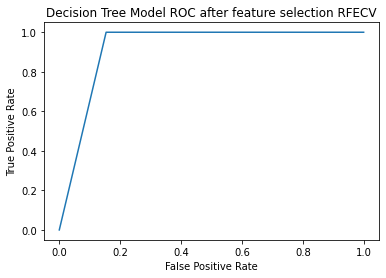


AUC score after feauture selection =  0.9230769230769231


In [ ]:
##calculate the Performance measures
accuracy3 = accuracy_score(Ytesting, newYPredicting1) * 100  ##new accuracy
confMat3 = confusion_matrix(Ytesting, newYPredicting1)  ##new Confusion matrix
TP, FP, FN, TN = confMat3[0,0], confMat3[0,1], confMat3[1, 0], confMat3[1,1]  ##all parameters of the confusion matrix
sensitivity3 = TP/(TP+FN)  ##calculate new sensitivity and new specificity
specificity3 = TN/(TN+FP)
print("Decision Tree Classification after RFECV")   ##print all the performance measures
print("Accuracy = ", accuracy3, "%", "\nSensitivity = ", sensitivity3, "\nSpecificity = ", specificity3)
FPR, TPR, thresholds = roc_curve(Ytesting, newYPredicting1)    ##The roc_curve function for the classifer after feature selection
plt.plot(FPR, TPR)           ##both the FPR and TPR are plotted in X and Y axis respectively
plt.title("Decision Tree Model ROC after feature selection RFECV")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

##new AUC score
dtAuc2 = roc_auc_score(Ytesting, newYPredicting1)  
print("\nAUC score after feauture selection = ", dtAuc2)

In [ ]:
#KNN Classification 

In [ ]:
##splitting data again
Xtraining, Xtesting, Ytraining, Ytesting = train_test_split(X, Y, test_size = 0.2, random_state = 10) ##test_size = 0.2 as question says
##80% training and 20% testing
KNNModel = KNeighborsClassifier(n_neighbors=3)  ##create model
KNNModel.fit(Xtraining, Ytraining)  ##train model
YPredicting = KNNModel.predict(Xtesting)  ##prediction
##accuracy with inbuilt accuracy_score
accuracy4 = accuracy_score(Ytesting, YPredicting) * 100
print("Accuracy = ", accuracy4,"%")

Accuracy =  70.0 %


KNN Classification before feature selection method
Accuracy =  70.0 % 
Sensitivity =  0.7692307692307693 
Specificity =  0.5714285714285714


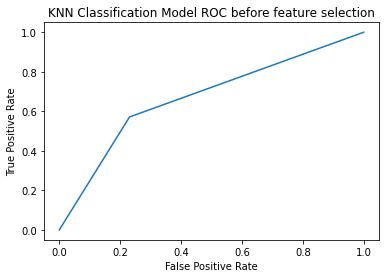


AUC score before feauture selection =  0.6703296703296703


In [ ]:
confMat4 = confusion_matrix(Ytesting, YPredicting)  ##Confusion matrix
TP, FP, FN, TN = confMat4[0,0], confMat4[0,1], confMat4[1, 0], confMat4[1,1]  ##all parameters of the confusion matrix
sensitivity4 = TP/(TP+FN)  ##sensitivity and specificity
specificity4 = TN/(TN+FP)
print("KNN Classification before feature selection method")   ##print all the performance measures
print("Accuracy = ", accuracy4, "%", "\nSensitivity = ", sensitivity4, "\nSpecificity = ", specificity4)
FPR, TPR, thresholds = roc_curve(Ytesting, YPredicting)    ##The roc_curve function for the KNN classifer before feature selection
plt.plot(FPR, TPR)          
plt.title("KNN Classification Model ROC before feature selection")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

##AUC score
knAuc1 = roc_auc_score(Ytesting, YPredicting)   
print("\nAUC score before feauture selection = ", knAuc1)

In [ ]:
##HYPER PARAMETER TUNING

In [ ]:
KNNModel.get_params() ##checking what parameters to tune

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
##parameter Grid with features to be tuned and the GridSearchCV does a exhaustive search using this grid to find the best features
##the meaning of each feature can be found in documentation for sklearn.neighbors.KNeighborsClassifier
parameterGrid2 = {
    'algorithm': ['auto', 'brute', 'kd_tree'],
    'leaf_size': [10, 30],
    'n_neighbors': [3,5],
    'p': [1,2],
    'weights': ['uniform','distance']
    }

##new model using GridSearchCV here cross-validation is set to 5
KNNModel2 = GridSearchCV(KNNModel, parameterGrid2, scoring = 'accuracy', cv = 5, verbose = 2)  
Xtemp = Xtraining           ##copying X and Y to temperory variables
Ytemp = Ytraining
KNNModel2.fit(Xtemp, Ytemp)   ##training model using fit to find out the best combo of features

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=uniform; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=distance; total time=   0.0s
[CV] END algorithm=auto, leaf_size=10, n_neighbors=3, p=1, weights=distance; to

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'algorithm': ['auto', 'brute', 'kd_tree'],
                         'leaf_size': [10, 30], 'n_neighbors': [3, 5],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=2)

In [ ]:
KNNModel2.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 3,
 'p': 1,
 'weights': 'uniform'}

In [ ]:
##feature selection using RFECV
wrapper = RFECV(estimator=RandomForestClassifier(), cv=5, scoring = 'accuracy') ##feature selection with RFECV
wrapper = wrapper.fit(Xtraining, Ytraining)    ##training the wrapper on previous training datasets 
newXtraining = wrapper.transform(Xtraining)   ##The X training and testing datasets are transformed using transform()
newXtesting = wrapper.transform(Xtesting)     ##transform() only keeps the selected features and discards the rest

KNNModel3 = KNeighborsClassifier()  ##creating a new KNN Classifier Model
KNNModel3.fit(newXtraining, Ytraining) ##Training the model
newYPredicting2 = KNNModel3.predict(newXtesting)  ##predicting using new X testining dataset
accuracy5 = accuracy_score(Ytesting, newYPredicting1) *100

KNN Classification after feature selection method
Accuracy =  90.0 % 
Sensitivity =  1.0 
Specificity =  0.7777777777777778


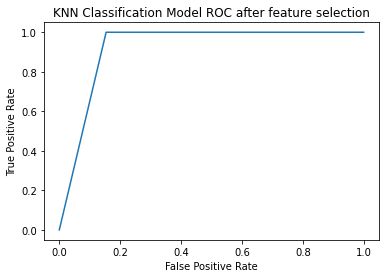


AUC score after feauture selection =  0.9230769230769231


In [ ]:
confMat5 = confusion_matrix(Ytesting, newYPredicting2)  ##Confusion matrix
TP, FP, FN, TN = confMat5[0,0], confMat5[0,1], confMat5[1, 0], confMat5[1,1]  ##all parameters of the confusion matrix
sensitivity5 = TP/(TP+FN)  ##sensitivity and specificity
specificity5 = TN/(TN+FP)
print("KNN Classification after feature selection method")   ##print all the performance measures
print("Accuracy = ", accuracy5, "%", "\nSensitivity = ", sensitivity5, "\nSpecificity = ", specificity5)
FPR, TPR, thresholds = roc_curve(Ytesting, newYPredicting2)    ##The roc_curve function for the KNN classifer
plt.plot(FPR, TPR)          
plt.title("KNN Classification Model ROC after feature selection")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

##AUC score
knAuc2 = roc_auc_score(Ytesting, newYPredicting2)   
print("\nAUC score after feauture selection = ", knAuc2)